### This is a step by step guid on how to parse, plot, and analyse an election

#### importing: 

In [1]:
import pandas as pd 
import seaborn as sns
from scipy.stats import kurtosis, skew

from rcv_dimensionality import *
from rcv_distribution import *
from voting_rules import *

#### see the raw ballots of an example:

In [2]:
csv = "example.csv"
election = pd.read_csv(csv)
print(election)

   rank1    rank2    rank3    rank4
0      A        B        C        D
1      A        B  skipped  skipped
2      A        B  skipped  skipped
3      A        B  skipped  skipped
4      B        A  skipped  skipped
5      B        A  skipped  skipped
6      B        A  skipped  skipped
7      B        C  skipped  skipped
8      A  skipped  skipped  skipped
9      A  skipped  skipped  skipped
10     A  skipped  skipped  skipped
11     C        D  skipped  skipped
12     C        D  skipped  skipped
13     A        D  skipped  skipped
14     A        C  skipped  skipped
15     B        A        C  skipped
16     D  skipped  skipped  skipped
17     D  skipped  skipped  skipped
18     A        D        C  skipped
19     D        C        B        A
20     B        C  skipped  skipped
21     B  skipped  skipped  skipped
22     C  skipped  skipped  skipped
23     A  skipped  skipped  skipped
24     A  skipped  skipped  skipped
25     D  skipped  skipped  skipped
26     B        D        C  

#### parse the data and see how many of each  ballot exists

In [3]:
ballots, candidates = parse_election_data(csv)
print(candidates)
df = pd.DataFrame(ballots.keys(), ballots.values())
columns =  election.columns.tolist()
df.columns = columns
print(df)

['A', 'B', 'C', 'D']
  rank1 rank2 rank3 rank4
2     A     B     C     D
3     A     B  None  None
3     B     A  None  None
4     B     C  None  None
5     A  None  None  None
3     C     D  None  None
1     A     D  None  None
2     A     C  None  None
1     B     A     C  None
5     D  None  None  None
1     A     D     C  None
1     D     C     B     A
1     B  None  None  None
1     C  None  None  None
1     B     D     C  None
1     C     D     B  None
5     D     C  None  None


In [4]:
election = voting_rules(ballots, candidates)
print(election.irv())

A


/Users/Mahshad/Documents/GitHub/bugs-in-democracy/team_arrow/clean/rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'A': 0.0, 'B': 0.7285930814483654, 'C': 2.1560754090059455, 'D': 3.0}


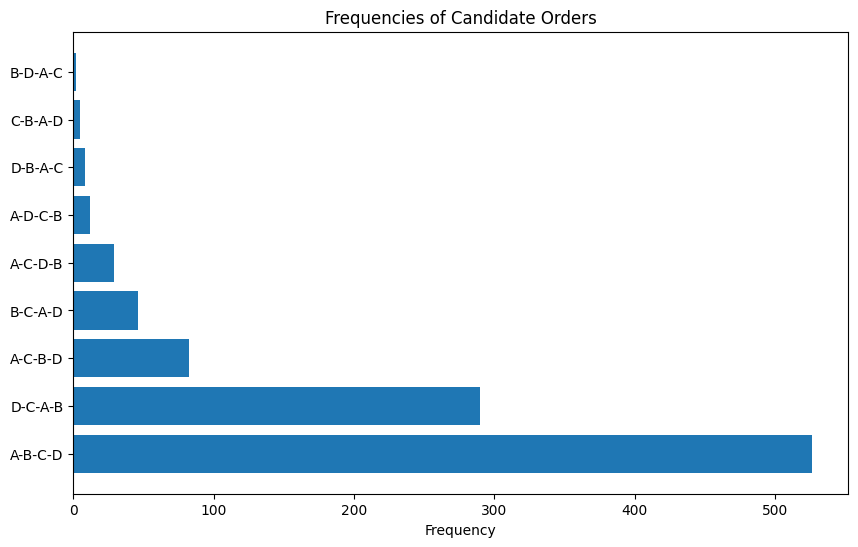

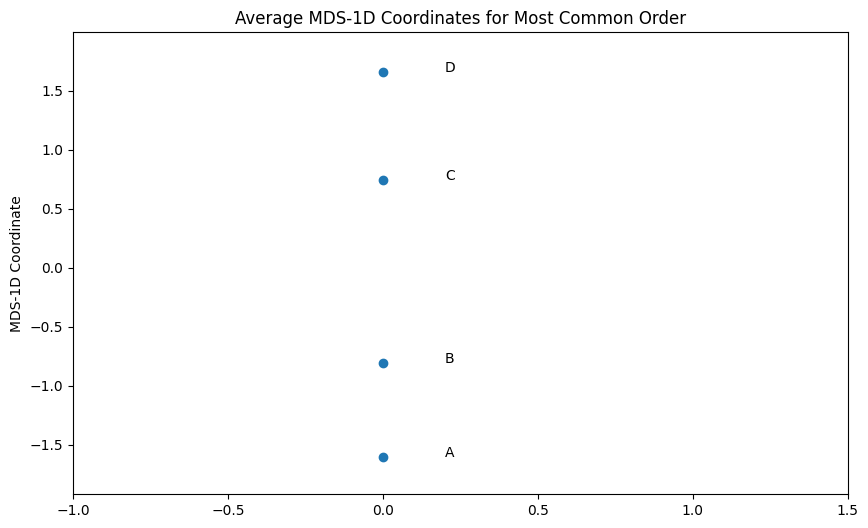

In [5]:
# Test the function with a custom CSV file

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test


# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances)
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(ballots, candidates, normalized_distances)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]



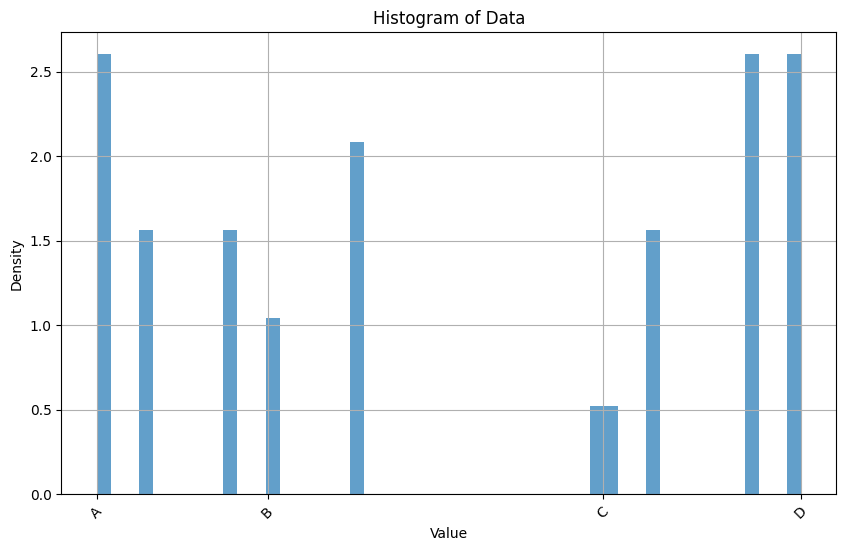

In [6]:
normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])
    
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


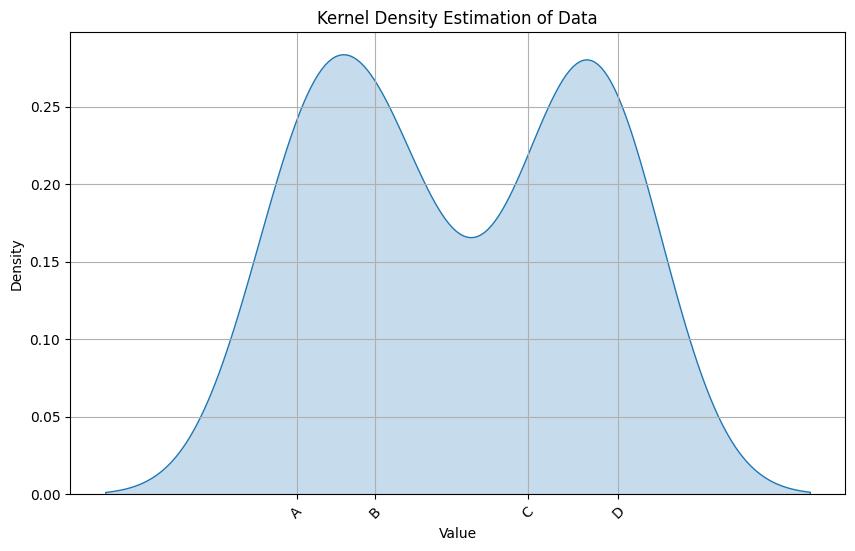

In [7]:

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [8]:
ballots, candidates = parse_election_data(csv)

# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate bimodality coefficient
n = len(data_points)
bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Bimodality coefficient:", bimodality)

print("Gamma coefficiet:", get_gamma(normalized_distances, ballots, candidates)[0])



Bimodality coefficient: 0.6140258127053885
Gamma coefficiet: 0.8


In [10]:
mcp = []
mcp_num = []
for k in normalized_distances:
    mcp.append(k)
    mcp_num.append(normalized_distances[k])

temp = {}
for i in range(len(mcp)):
    temp[mcp[i]] = i
c = 0
total = 0
for b in ballots:
    if len(b) > 0:
        total += ballots[b] 
        b_num = []
        for candidate in b:
            if candidate in mcp:
                b_num.append(temp[candidate])
        consistency = evaluate_ballot_consistency(b_num)
        if (consistency[0] is True):
            print("This ballot is consistent with ", mcp, ": ", b)
            c += ballots[b]

This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('A', 'B', 'C', 'D')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('A', 'B')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('B', 'A')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('B', 'C')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('A',)
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('C', 'D')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('B', 'A', 'C')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('D',)
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('D', 'C', 'B', 'A')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('B',)
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('C',)
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('C', 'D', 'B')
This ballot is consistent with  ['A', 'B', 'C', 'D'] :  ('D', 'C')


In [13]:
mcp = []
mcp_num = []
for k in normalized_distances:
    mcp.append(k)
    mcp_num.append(normalized_distances[k])

temp = {}
for i in range(len(mcp)):
    temp[mcp[i]] = i
c = 0
total = 0
for b in ballots:
    if len(b) > 0:
        total += ballots[b] 
        b_num = []
        for candidate in b:
            if candidate in mcp:
                b_num.append(temp[candidate])
        consistency = evaluate_ballot_consistency(b_num)
        if (consistency[0] is True):
            c += ballots[b]
        else:
            print("This ballot is not consistent with ", mcp, ": ", b)

This ballot is not consistent with  ['A', 'B', 'C', 'D'] :  ('A', 'D')
This ballot is not consistent with  ['A', 'B', 'C', 'D'] :  ('A', 'C')
This ballot is not consistent with  ['A', 'B', 'C', 'D'] :  ('A', 'D', 'C')
This ballot is not consistent with  ['A', 'B', 'C', 'D'] :  ('B', 'D', 'C')
